# Практика

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [14]:
mu = 1
sigma = 3
norm_rv = sts.norm(mu, sigma)
sample = norm_rv.rvs(size=100)
sample

array([-2.6852627 ,  0.48253279,  1.31381228,  0.92711133,  2.92965638,
       -0.61332998,  5.72130516, -2.71471573,  2.46044671,  0.48929768,
       -3.41783776,  1.05049807,  6.78004393, -8.22711769,  5.07683762,
        6.30218213,  2.26306686,  2.43358736,  6.46979865, -1.54575175,
       -0.54439166,  2.97568482,  1.43256908,  5.84876009,  3.56343114,
        5.7182362 ,  4.68651181,  1.0201914 , -5.34742131, -0.55123322,
       -1.12691036,  2.152772  ,  1.78129633,  0.4345685 , -0.46720659,
        4.0660841 , -3.80619374,  4.46459311, -3.28947547,  3.93018958,
        4.32433508,  4.28775305,  0.50514636,  1.30037866, -0.48392996,
        2.50001244,  1.69755963,  1.81270414,  0.57387226,  1.45598446,
       -1.40088053,  2.41329883, -0.41261081, -0.52473182,  4.70225748,
        4.0272977 , -2.69003883, -1.8664261 ,  0.32601891, -2.09317569,
        0.23176928, 11.41349081,  0.03842383, -0.12984664, -2.27001299,
        2.29024813,  4.31902783,  3.38231131,  4.94926533,  1.45

In [15]:
sample.dtype

dtype('float64')

In [17]:
real_mean = norm_rv.mean() # настоящее среднее случайной величины
real_mean

1.0

In [18]:
real_var = norm_rv.var() # настоящая дисперсия случайной величины
real_var

9.0

### Постройте гистограмму выборки и теоретическую плотность распределения

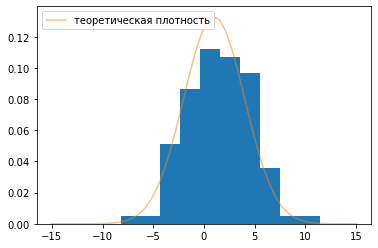

In [38]:
plt.hist(sample, density=True)
x = np.linspace(-15,15)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [40]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

1.5200378058847315
10.096802216081846


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

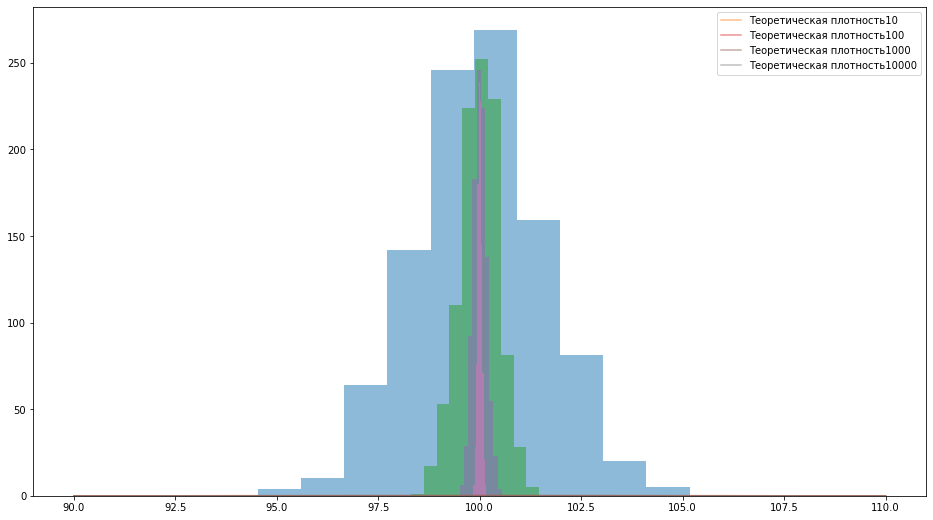

In [24]:
plt.figure(figsize=(16,9))
norm_rv = sts.norm(100, 5)
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(norm_rv.rvs(N)))
    plt.hist(means, alpha=0.5)
    x = np.linspace(90, 110)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label=f'Теоретическая плотность{N}', alpha=0.5)
    plt.legend()
#     plt.plot()

# plt.legend(['10', '100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**
аппроксимация распределения выборочных средних центральной предельной теоремой (ЦПТ) работает хорошо для большинства распределений, если выборка достаточно большая (обычно порядка 30 и более).

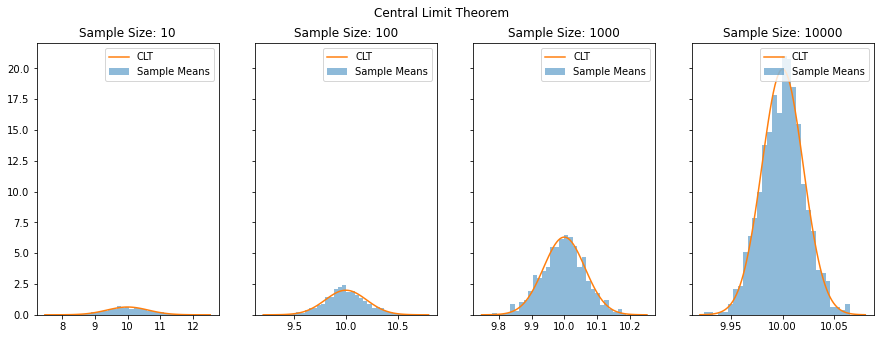

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# задаем параметры распределения
mu = 10
sigma = 2

# задаем количество выборок и их объемы
n_samples = 1000
sample_sizes = [10, 100, 1000, 10000]

# генерируем выборки
samples = {}
for i in range(n_samples):
    for size in sample_sizes:
        if size not in samples:
            samples[size] = []
        sample = np.random.normal(mu, sigma, size)
        mean = np.mean(sample)
        samples[size].append(mean)

# строим гистограммы выборочных средних и теоретическое распределение выборочных средних по ЦПТ
fig, axs = plt.subplots(1, len(sample_sizes), figsize=(15, 5), sharey=True)
for i, size in enumerate(sample_sizes):
    axs[i].hist(samples[size], bins=30, density=True, alpha=0.5, label='Sample Means')
    x = np.linspace(mu - 4*sigma/np.sqrt(size), mu + 4*sigma/np.sqrt(size), 100)
    axs[i].plot(x, norm.pdf(x, mu, sigma/np.sqrt(size)), label='CLT')
    axs[i].set_title('Sample Size: {}'.format(size))
    axs[i].legend()

plt.suptitle('Central Limit Theorem')
plt.show()

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from statsmodels.stats.weightstats import _zconfint_generic

# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [30]:
churned_calls = df[df['churn'] == True]['total day calls']
churned_mean = churned_calls.mean()
churned_std = churned_calls.std(ddof=1)
n = len(churned_calls)
alpha = 0.05
z = norm.ppf(1 - alpha / 2)
churned_interval = (churned_mean - z * churned_std / np.sqrt(n), churned_mean + z * churned_std / np.sqrt(n))
print(churned_interval)

(99.41066229112079, 103.26014516229537)


In [34]:
from statsmodels.stats.weightstats import _zconfint_generic
calls_churn_1 = df[df['churn']==True]['total day calls']
mean_calls_churn_1 = calls_churn_1.mean()
std_calls_churn_1 = calls_churn_1.std(ddof=1)
n_calls_churn_1 = calls_churn_1.shape[0]
_zconfint_generic(mean_calls_churn_1, std_calls_churn_1 / np.sqrt(n_calls_churn_1), alpha=0.05, alternative='two-sided')


(99.41066229112079, 103.26014516229537)